# Deep Learning with Neural Networks
By Aryan Garg

## Get Data

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time
import numpy as np
import pandas as pd
import itertools
import heapq
import matplotlib.pyplot as plt

file_name = 'who.csv'
data = pd.read_csv(file_name)



columns_of_interest = np.array([
    'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles',
    'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
    'HIV/AIDS', 'GDP', 'Population', 'thinness1-19', 'thinness5-9',
    'Income composition of resources', 'Schooling'
])

data = data.dropna()
output = data['Life expectancy']
data = data[columns_of_interest]

## Normalize Data

In [6]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Deep Learning

In [7]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

train_in, test_in, train_out, test_out = train_test_split(data, output, test_size=0.2)


modelA = models.Sequential([
	layers.Dense(64,activation='relu',input_shape=(train_in.shape[1],)),
	layers.Dense(64,activation='relu'),
	layers.Dense(64,activation='relu'),
	layers.Dense(1,activation='linear')
])

modelB = models.Sequential([
	layers.Dense(10,activation='relu',input_shape=(train_in.shape[1],)),
	layers.Dense(1,activation='linear')
])

modelC = models.Sequential([
	layers.Dense(5,activation='relu',input_shape=(train_in.shape[1],)),
	layers.Dense(10,activation='relu'),
	layers.Dense(5,activation='relu'),
	layers.Dense(1,activation='linear')
])



2024-04-24 23:38:18.734034: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-24 23:38:19.698470: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 23:38:22.300022: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/agarg/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model ins

In [8]:
# function to plot loss over epochs
def plot_loss(history, name):
	plt.figure(figsize=(10, 5))
	plt.plot(history.history['loss'], label='train')
	plt.plot(history.history['val_loss'], label='test')
	plt.title(f'Model {name} Loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.legend()
	plt.show()

optimizerA = tf.keras.optimizers.Adam(learning_rate=0.001)
modelA.compile(loss='mean_squared_error',optimizer=optimizerA,metrics=['mean_squared_error'])
historyA=modelA.fit(train_in,train_out,epochs=50,validation_data=(test_in,test_out))

modelB.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
historyB=modelB.fit(train_in,train_out,epochs=50,validation_data=(test_in,test_out))

modelC.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
historyC=modelC.fit(train_in,train_out,epochs=50,validation_data=(test_in,test_out))


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4556.1816 - mean_squared_error: 4557.2798 - val_loss: 2783.0203 - val_mean_squared_error: 2796.7493
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1745.6290 - mean_squared_error: 1746.3937 - val_loss: 311.5362 - val_mean_squared_error: 321.1165
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.1012 - mean_squared_error: 283.0169 - val_loss: 194.2593 - val_mean_squared_error: 196.2785
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179.5129 - mean_squared_error: 179.4535 - val_loss: 158.0042 - val_mean_squared_error: 159.4509
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 149.1400 - mean_squared_error: 149.1413 - val_loss: 139.3250 - val_mean_squared_error: 141.4908
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128.2596 - mean_squared_error: 128.2482 - val_loss: 120.4284 - val_mean_squared_error: 121.8126
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.2159 - 

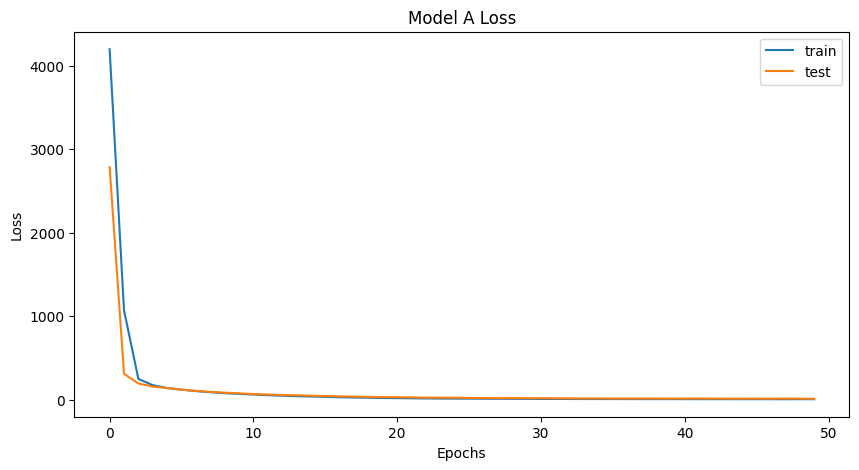

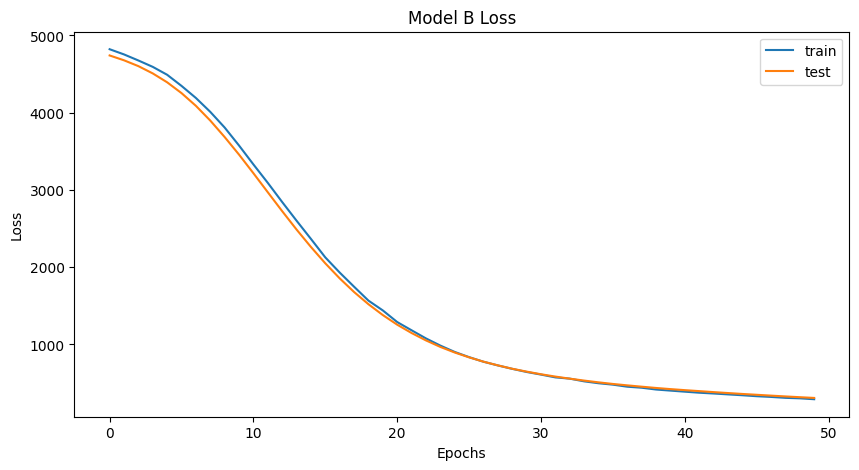

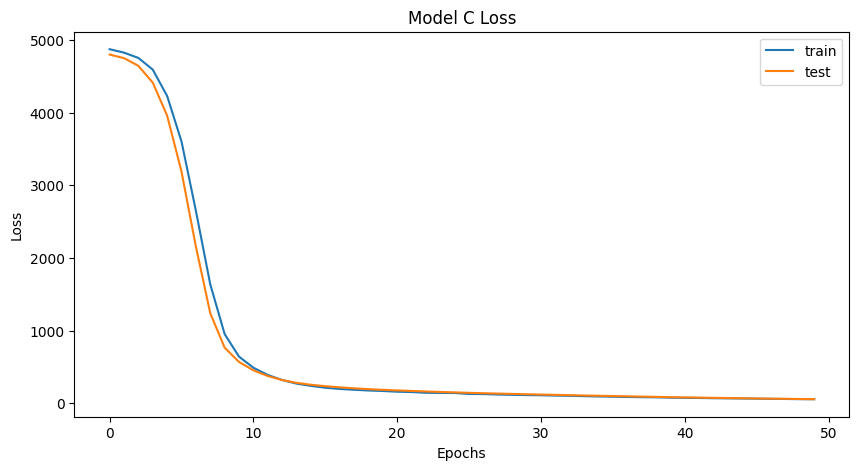

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.8167 - mean_squared_error: 11.7249 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 316.5119 - mean_squared_error: 314.7789 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56.1341 - mean_squared_error: 55.8851 


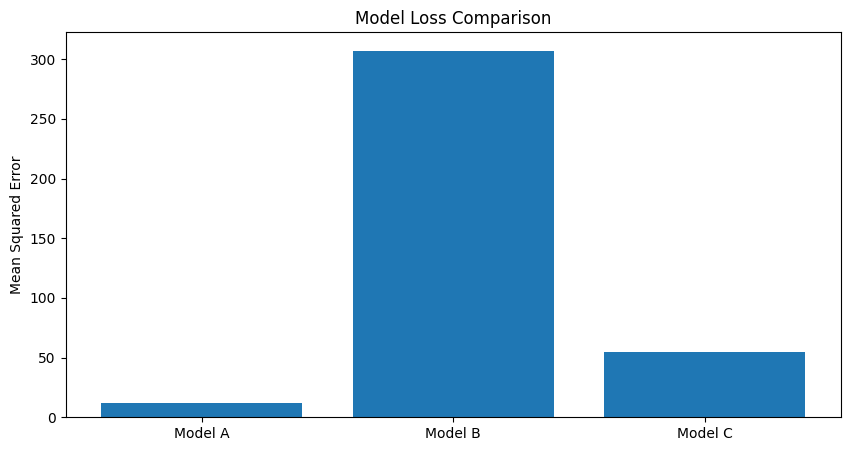

In [9]:
plot_loss(historyA, 'A')
plot_loss(historyB, 'B')
plot_loss(historyC, 'C')

modelA_loss = modelA.evaluate(test_in, test_out)[0]
modelB_loss = modelB.evaluate(test_in, test_out)[0]
modelC_loss = modelC.evaluate(test_in, test_out)[0]
plt.figure(figsize=(10, 5))
plt.bar(['Model A', 'Model B', 'Model C'], [modelA_loss, modelB_loss, modelC_loss])
plt.title('Model Loss Comparison')
plt.ylabel('Mean Squared Error')
plt.show()

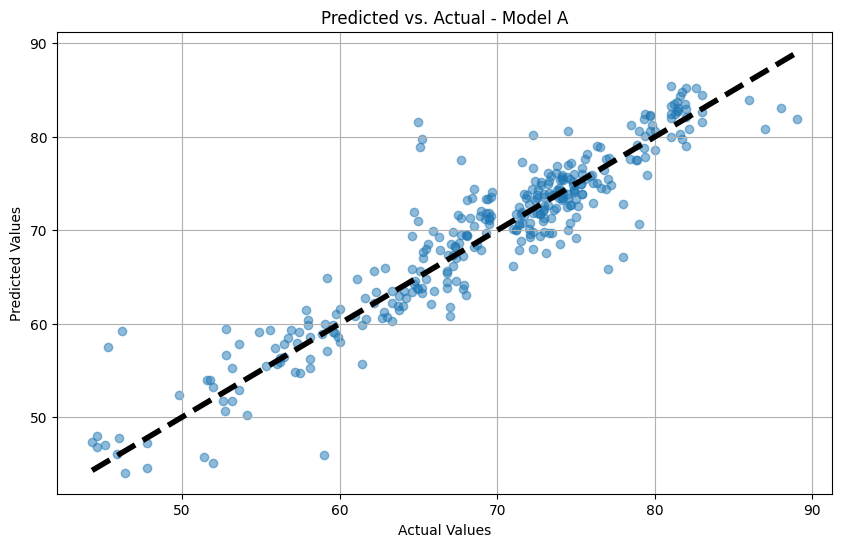

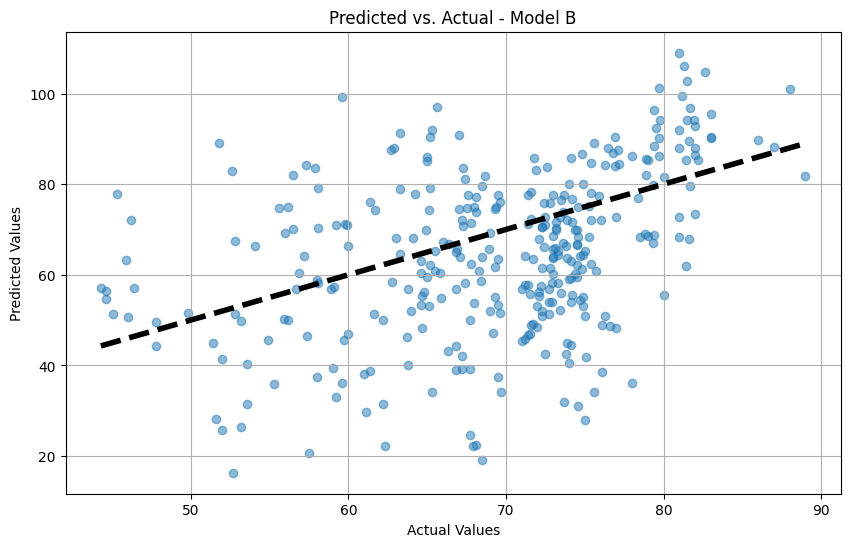

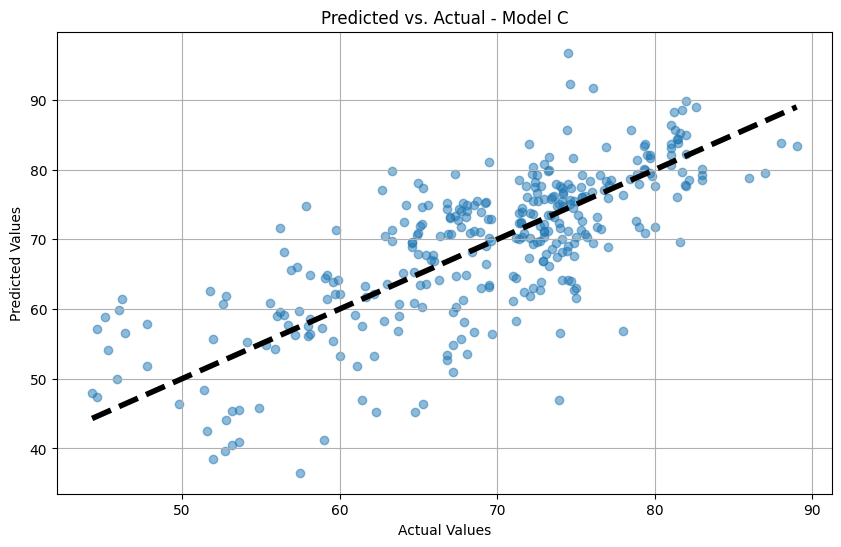

In [10]:

def plot_predictions_vs_actual(model, test_inputs, test_outputs, title="Predicted vs. Actual"):
	predictions = model(test_inputs)
	plt.figure(figsize=(10, 6))
	plt.scatter(  test_outputs, predictions, alpha=0.5)
	plt.title(title)
	plt.xlabel('Actual Values')
	plt.ylabel('Predicted Values')
	plt.grid(True)
	plt.plot([test_outputs.min(), test_outputs.max()], [test_outputs.min(), test_outputs.max()], 'k--', lw=4)
	plt.show()

plot_predictions_vs_actual(modelA, test_in, test_out, "Predicted vs. Actual - Model A")
plot_predictions_vs_actual(modelB, test_in, test_out, "Predicted vs. Actual - Model B")
plot_predictions_vs_actual(modelC, test_in, test_out, "Predicted vs. Actual - Model C")



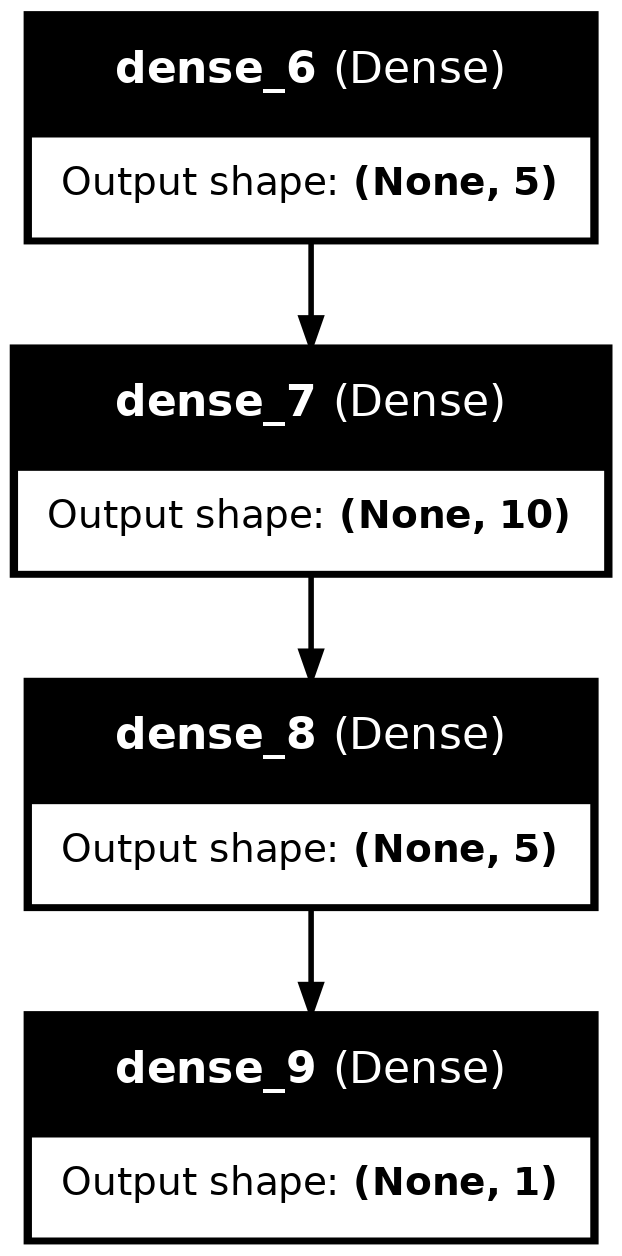

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(modelA, to_file='modelA.png', show_shapes=True, show_layer_names=True)
plot_model(modelB, to_file='modelB.png', show_shapes=True, show_layer_names=True)
plot_model(modelC, to_file='modelC.png', show_shapes=True, show_layer_names=True)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1

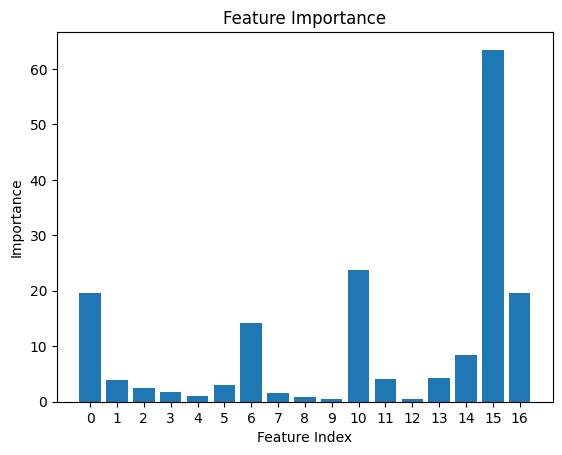

Feature List: ['infant deaths' 'Alcohol' 'percentage expenditure' 'Hepatitis B'
 'Measles' 'BMI' 'under-five deaths' 'Polio' 'Total expenditure'
 'Diphtheria' 'HIV/AIDS' 'GDP' 'Population' 'thinness1-19' 'thinness5-9'
 'Income composition of resources' 'Schooling']


In [12]:
from sklearn.inspection import permutation_importance

results = permutation_importance(modelA, test_in, test_out, scoring='neg_mean_squared_error')
importance = results.importances_mean

plt.bar(range(test_in.shape[1]), importance)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.xticks(range(test_in.shape[1]))
plt.show()

print(f"Feature List: {columns_of_interest}")

In [13]:
print(f"Column 0: {columns_of_interest[0]}")
print(f"Column 6: {columns_of_interest[6]}")
print(f"Column 10: {columns_of_interest[10]}")
print(f"Column 15: {columns_of_interest[15]}")
print(f"Column 16: {columns_of_interest[16]}")



Column 0: infant deaths
Column 6: under-five deaths
Column 10: HIV/AIDS
Column 15: Income composition of resources
Column 16: Schooling
